## https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
data =pd.read_csv('bank-additional-full.csv',sep=';')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [4]:
data.shape

(41188, 21)

In [5]:
dict_y ={"y":{'yes':1,'no':0}}
data.replace(dict_y,inplace = True)

In [6]:
data=pd.get_dummies(data=data,columns=['job','education','default','housing','loan','contact',
'month','day_of_week','poutcome','marital'])

In [7]:
data.shape

(41188, 64)

In [8]:
def show_confusion_matrix(C,class_labels=['0','1']):
    """
    C: ndarray, shape (2,2) as given by scikit-learn confusion_matrix function
    class_labels: list of strings, default simply labels 0 and 1.

    Draws confusion matrix with associated metrics.
    """
    import matplotlib.pyplot as plt
    import numpy as np
    
    assert C.shape == (2,2), "Confusion matrix should be from binary classification only."
    
    # true negative, false positive, etc...
    tn = C[0,0]; fp = C[0,1]; fn = C[1,0]; tp = C[1,1];

    NP = fn+tp # Num positive examples
    NN = tn+fp # Num negative examples
    N  = NP+NN

    fig = plt.figure(figsize=(8,8))
    ax  = fig.add_subplot(111)
    ax.imshow(C, interpolation='nearest', cmap=plt.cm.gray)

    # Draw the grid boxes
    ax.set_xlim(-0.5,2.5)
    ax.set_ylim(2.5,-0.5)
    ax.plot([-0.5,2.5],[0.5,0.5], '-k', lw=2)
    ax.plot([-0.5,2.5],[1.5,1.5], '-k', lw=2)
    ax.plot([0.5,0.5],[-0.5,2.5], '-k', lw=2)
    ax.plot([1.5,1.5],[-0.5,2.5], '-k', lw=2)

    # Set xlabels
    ax.set_xlabel('Predicted Label', fontsize=16)
    ax.set_xticks([0,1,2])
    ax.set_xticklabels(class_labels + [''])
    ax.xaxis.set_label_position('top')
    ax.xaxis.tick_top()
    # These coordinate might require some tinkering. Ditto for y, below.
    ax.xaxis.set_label_coords(0.2,0.7)

    # Set ylabels
    ax.set_ylabel('True Label', fontsize=16, rotation=90)
    ax.set_yticklabels(class_labels + [''],rotation=90)
    ax.set_yticks([0,1,2])
    ax.yaxis.set_label_coords(-0.09,0.65)


    # Fill in initial metrics: tp, tn, etc...
    ax.text(0,0,
            'True Neg: %d\n(Num Neg: %d)'%(tn,NN),
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))

    ax.text(0,1,
            'False Neg: %d'%fn,
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))

    ax.text(1,0,
            'False Pos: %d'%fp,
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))


    ax.text(1,1,
            'True Pos: %d\n(Num Pos: %d)'%(tp,NP),
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))

    # Fill in secondary metrics: accuracy, true pos rate, etc...
    ax.text(2,0,
            'False Pos Rate: %.2f'%(fp / (fp+tn+0.)),
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))

    ax.text(2,1,
            'True Pos Rate: %.2f'%(tp / (tp+fn+0.)),
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))

    ax.text(2,2,
            'Accuracy: %.2f'%((tp+tn+0.)/N),
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))

    ax.text(0,2,
            'Neg Pre Val: %.2f'%(1-fn/(fn+tn+0.)),
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))

    ax.text(1,2,
            'Pos Pred Val: %.2f'%(tp/(tp+fp+0.)),
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))


    plt.tight_layout()
    plt.show()

In [9]:
X = data.drop('y', axis = 1)
y = data['y']

##### LogisticRegression

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=10)
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [11]:
C = confusion_matrix(y_train,clf.predict(X_train))
training_Accuracy_score = ((C[0,0]+C[1,1])/(C[0,0]+C[0,1]+C[1,0]+C[1,1]))
training_Senstivity =  C[1,1]/(C[1,0]+C[1,1])
training_Specifity = C[0,0]/(C[0,1]+C[0,0])



             precision    recall  f1-score   support

          0       0.92      0.98      0.95     10935
          1       0.67      0.39      0.49      1422

avg / total       0.90      0.91      0.90     12357



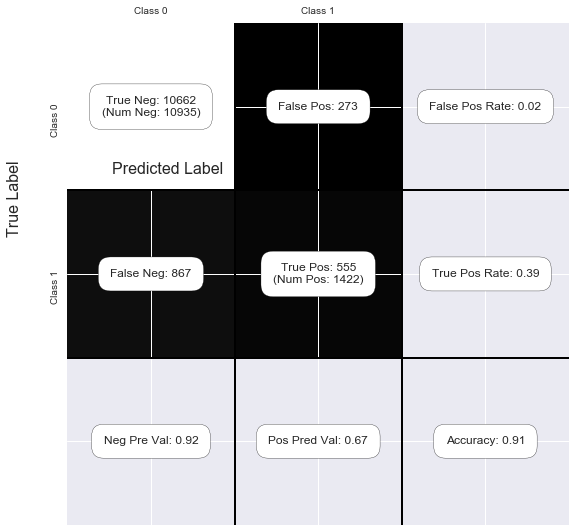

In [12]:
C = confusion_matrix(y_test,clf.predict(X_test))
testing_Accuracy_score = ((C[0,0]+C[1,1])/(C[0,0]+C[0,1]+C[1,0]+C[1,1]))
testing_Senstivity =  C[1,1]/(C[1,0]+C[1,1])
testing_Specifity = C[0,0]/(C[0,1]+C[0,0])
final_dict=[{'Model':'LR','Train_A_S':training_Accuracy_score
    ,'Train_TPR':training_Senstivity,
    'Train_TNR':training_Specifity,
    'Test_A_S':testing_Accuracy_score,
    'Test_TPR':testing_Senstivity,
    'Test_TNR':testing_Specifity}]
print(classification_report(y_test,clf.predict(X_test)))
show_confusion_matrix(C, ['Class 0', 'Class 1'])
#final_dict

##### KFold Cross Validation

In [13]:
kf = KFold(n_splits=5, shuffle=True)
for train,test in kf.split(X):
    #print("hello")
    X_train, X_test = X.iloc[train], X.iloc[test]
    y_train, y_test = y.iloc[train], y.iloc[test]
    clf = LogisticRegression()
    clf.fit(X_train,y_train)
    print("Accuracy Score {:.3f}".format(accuracy_score(y_test,clf.predict(X_test))))
    C = confusion_matrix(y_test,clf.predict(X_test))
    #show_confusion_matrix(C, ['Class 0', 'Class 1'])
    tpr = C[1,1]/(C[1,0]+C[1,1])
    fpr = C[0,1]/(C[0,1]+C[0,0])
        
    print("FPR {:.3f}".format(fpr))
    print("TPR {:.3f}".format(tpr))
    
    
    
    


crossval_score = cross_val_score(clf,X,y,cv=kf)
print("CrossValScore ",crossval_score.mean())

Accuracy Score 0.910
FPR 0.026
TPR 0.403
Accuracy Score 0.911
FPR 0.023
TPR 0.404
Accuracy Score 0.911
FPR 0.025
TPR 0.400
Accuracy Score 0.911
FPR 0.027
TPR 0.417
Accuracy Score 0.910
FPR 0.027
TPR 0.415
CrossValScore  0.909051201444


##### StratifiedKFold Validation

In [14]:
kf_stratified = StratifiedKFold(n_splits=5, shuffle=True)
for train,test in kf_stratified.split(X,y):
    #print("hello")
    X_train, X_test = X.iloc[train], X.iloc[test]
    y_train, y_test = y.iloc[train], y.iloc[test]
    clf = LogisticRegression()
    clf.fit(X_train,y_train)
    print("Accuracy Score {:.3f}".format(accuracy_score(y_test,clf.predict(X_test))))
    C = confusion_matrix(y_test,clf.predict(X_test))
    tpr = C[1,1]/(C[1,0]+C[1,1])
    fpr = C[0,1]/(C[0,1]+C[0,0])
        #fpr = c[]
    print("FPR {:.3f}".format(fpr))
    print("TPR {:.3f}".format(tpr))
    #show_confusion_matrix(C, ['Class 0', 'Class 1'])
crossval_score = cross_val_score(clf,X,y,cv=kf_stratified)
print("The cross val score is {:.3f}".format(crossval_score.mean()))

Accuracy Score 0.913
FPR 0.024
TPR 0.411
Accuracy Score 0.905
FPR 0.028
TPR 0.379
Accuracy Score 0.911
FPR 0.026
TPR 0.413
Accuracy Score 0.913
FPR 0.023
TPR 0.412
Accuracy Score 0.910
FPR 0.027
TPR 0.417
The cross val score is 0.910


In [15]:
param_grid = {'C': [0.01, 0.1, 1, 10, 100, 1000] }
clf_CV = GridSearchCV(LogisticRegression(penalty='l2'), param_grid)

{'C': 0.01}


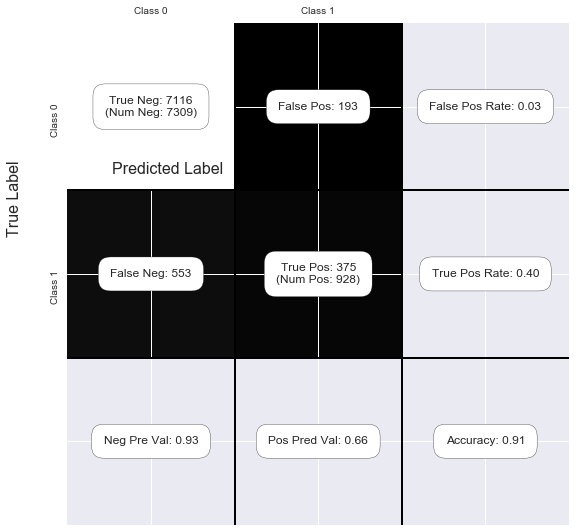

In [16]:
clf_CV.fit(X_train, y_train)
print(clf_CV.best_params_)
C = confusion_matrix(y_test,clf_CV.predict(X_test))
show_confusion_matrix(C, ['Class 0', 'Class 1'])

##### GridSearchCV

{'C': 0.01}


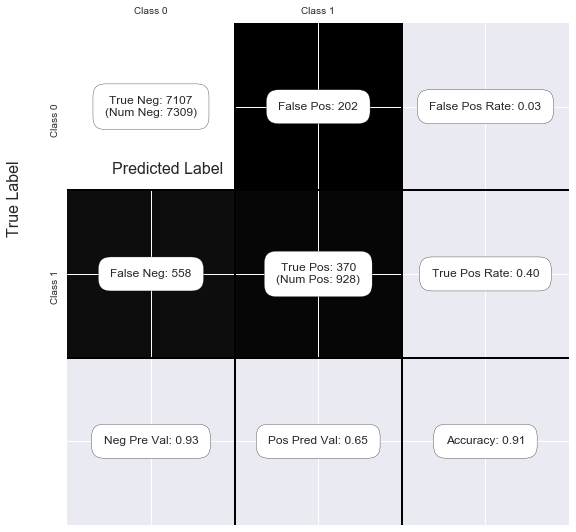

In [17]:
param_grid = {'C': [0.01, 0.1, 1, 10, 100] }
clf_CV = GridSearchCV(LogisticRegression(penalty='l1'), param_grid)
clf_CV.fit(X_train, y_train)
print(clf_CV.best_params_)
C = confusion_matrix(y_test,clf_CV.predict(X_test))
show_confusion_matrix(C, ['Class 0', 'Class 1'])

##### UnderSampling

In [18]:
df_0=data[data['y']==0]

In [19]:
df_0.shape

(36548, 64)

In [20]:
df_1=data[data['y']==1]

In [21]:
df_1.shape

(4640, 64)

In [22]:
df_0.shape

(36548, 64)

In [23]:
chunkSize = 4640
numberChunks = len(df_0)//chunkSize
#print(numberChunks)

In [24]:
li_tpr = []
li_tnr = []
li_roc =[]
for i in range(numberChunks):
    df_split = df_0[i*chunkSize:(i+1)*chunkSize]
    frames = [df_split,df_1]
    final_df = pd.concat(frames)
    final_df = final_df.sample(frac=1)
    X_underSample = final_df.drop('y', axis = 1)
    y_underSample = final_df['y']
    X_train, X_test, y_train, y_test = train_test_split(X_underSample, y_underSample, 
                                                    test_size=0.3,random_state=10)
    clf = LogisticRegression(C=100,max_iter=1000)
    clf.fit(X_train, y_train)
    C = confusion_matrix(y_test,clf.predict(X_test))
    #print(C)
    tpr = C[1,1]/(C[1,0]+C[1,1])
    tnr = C[0,0]/(C[0,1]+C[0,0])
    print("TNR {:.3f}".format(tnr))
    print("TPR {:.3f}".format(tpr))
    li_tpr.append(tpr)
    li_tnr.append(tnr)
    print("ROC Score {:.3f}".format(roc_auc_score(y_test, clf.predict(X_test))))
    li_roc.append(roc_auc_score(y_test, clf.predict(X_test)))
    #print(C)
    #show_confusion_matrix(C, ['Class 0', 'Class 1'])
    #pred = clf.predict(X_test)
    #print(classification_report(y_test,pred))
    print("*******************")
    

TNR 0.986
TPR 0.967
ROC Score 0.976
*******************
TNR 0.982
TPR 0.945
ROC Score 0.964
*******************
TNR 0.977
TPR 0.946
ROC Score 0.961
*******************
TNR 0.965
TPR 0.948
ROC Score 0.957
*******************
TNR 0.986
TPR 0.953
ROC Score 0.969
*******************
TNR 0.975
TPR 0.900
ROC Score 0.937
*******************
TNR 0.959
TPR 0.900
ROC Score 0.929
*******************


In [25]:
li_tpr

[0.96708119970738848,
 0.94523470839260315,
 0.94569152787834898,
 0.94807965860597443,
 0.95262024407753054,
 0.90014265335235377,
 0.90028490028490027]

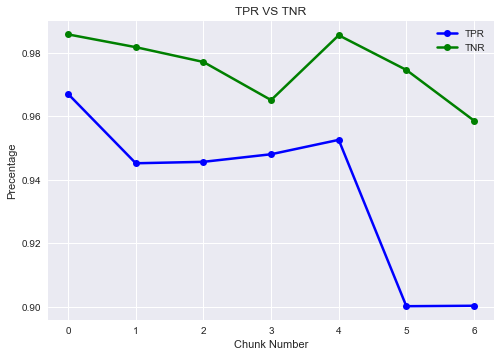

In [26]:
plt.plot(li_tpr,color="blue", linewidth=2.5, linestyle="-",label="TPR",marker='o')
plt.plot(li_tnr,color="green", linewidth=2.5, linestyle="-",label="TNR",marker='o')
plt.legend(loc='upper right')
plt.xlabel("Chunk Number")
plt.ylabel("Precentage")
plt.title("TPR VS TNR")

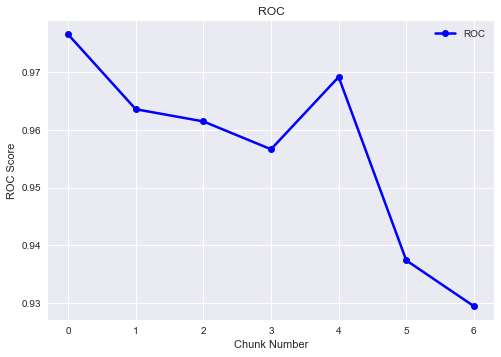

In [27]:
plt.plot(li_roc,color="blue", linewidth=2.5, linestyle="-",label="ROC",marker='o')
plt.legend(loc='upper right')
plt.xlabel("Chunk Number")
plt.ylabel("ROC Score")
plt.title("ROC")

In [28]:
kf_stratified = StratifiedKFold(n_splits=5, shuffle=True)
li_tpr = []
li_tnr = []
li_roc =[]
for i in range(numberChunks):
    df_split = df_0[i*chunkSize:(i+1)*chunkSize]
    frames = [df_split,df_1]
    final_df = pd.concat(frames)
    final_df = final_df.sample(frac=1)
    X_S = final_df.drop('y', axis = 1)
    y_S = final_df['y']
    print("*****************Chunk*********************",i)
    for train,test in kf_stratified.split(X_S,y_S):
    #print("hello")
        X_train, X_test = X_S.iloc[train], X_S.iloc[test]
        y_train, y_test = y_S.iloc[train], y_S.iloc[test]
        clf = LogisticRegression(C=100)
        clf.fit(X_train,y_train)
        print("Accuracy Score {:.3f}".format(accuracy_score(y_test,clf.predict(X_test))))
        C = confusion_matrix(y_test,clf.predict(X_test))
        tpr = C[1,1]/(C[1,0]+C[1,1])
        fpr = C[0,1]/(C[0,1]+C[0,0])
        li_tpr.append(tpr)
        li_tnr.append(tnr)
        #fpr = c[]
        print("TNR {:.3f}".format(tnr))
        print("TPR {:.3f}".format(tpr))
        print("ROC Score {:.3f}".format(roc_auc_score(y_test, clf.predict(X_test))))
        li_roc.append(roc_auc_score(y_test, clf.predict(X_test)))
        #pred = clf.predict(X_test)
        #print(classification_report(y_test,clf.predict(X_test)))
        #print(C)
        #show_confusion_matrix(C, ['Class 0', 'Class 1'])
    


*****************Chunk********************* 0
Accuracy Score 0.975
TNR 0.959
TPR 0.964
ROC Score 0.975
Accuracy Score 0.975
TNR 0.959
TPR 0.962
ROC Score 0.975
Accuracy Score 0.981
TNR 0.959
TPR 0.972
ROC Score 0.981
Accuracy Score 0.973
TNR 0.959
TPR 0.961
ROC Score 0.973
Accuracy Score 0.978
TNR 0.959
TPR 0.963
ROC Score 0.978
*****************Chunk********************* 1
Accuracy Score 0.968
TNR 0.959
TPR 0.952
ROC Score 0.968
Accuracy Score 0.971
TNR 0.959
TPR 0.960
ROC Score 0.971
Accuracy Score 0.967
TNR 0.959
TPR 0.959
ROC Score 0.967
Accuracy Score 0.969
TNR 0.959
TPR 0.953
ROC Score 0.969
Accuracy Score 0.970
TNR 0.959
TPR 0.956
ROC Score 0.970
*****************Chunk********************* 2
Accuracy Score 0.953
TNR 0.959
TPR 0.935
ROC Score 0.953
Accuracy Score 0.959
TNR 0.959
TPR 0.940
ROC Score 0.959
Accuracy Score 0.971
TNR 0.959
TPR 0.964
ROC Score 0.971
Accuracy Score 0.957
TNR 0.959
TPR 0.940
ROC Score 0.957
Accuracy Score 0.972
TNR 0.959
TPR 0.961
ROC Score 0.972
*******

###### RandomForestClassifier

In [29]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=10)
rfc = RandomForestClassifier(class_weight="balanced",n_jobs=2)
param_grid ={'n_estimators': [200, 700],
             'max_features': ['auto', 'sqrt', 'log2']}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid)
CV_rfc.fit(X_train, y_train)
print(X_train.shape)
print(CV_rfc.best_params_)


(28831, 63)
{'max_features': 'sqrt', 'n_estimators': 200}


In [30]:
C = confusion_matrix(y_train,CV_rfc.predict(X_train))
training_Accuracy_score = ((C[0,0]+C[1,1])/(C[0,0]+C[0,1]+C[1,0]+C[1,1]))
training_Senstivity =  C[1,1]/(C[1,0]+C[1,1])
training_Specifity = C[0,0]/(C[0,1]+C[0,0])

In [31]:
#pred = clf.predict(X_test)
C = confusion_matrix(y_test,CV_rfc.predict(X_test))
#show_confusion_matrix(C, ['Class 0', 'Class 1'])
tpr = C[1,1]/(C[1,0]+C[1,1])
tnr = C[0,0]/(C[0,1]+C[0,0])
print("TNR {:.3f}".format(tnr))
print("TPR {:.3f}".format(tpr))
#pred = clf.predict(X_test)
print(classification_report(y_test,CV_rfc.predict(X_test)))
#print(classification_report(y_test,pred))
testing_Accuracy_score = ((C[0,0]+C[1,1])/(C[0,0]+C[0,1]+C[1,0]+C[1,1]))
testing_Senstivity =  C[1,1]/(C[1,0]+C[1,1])
testing_Specifity = C[0,0]/(C[0,1]+C[0,0])
final_dict.append({'Model':'RFC','Train_A_S':training_Accuracy_score
    ,'Train_TPR':training_Senstivity,
    'Train_TNR':training_Specifity,
    'Test_A_S':testing_Accuracy_score,
    'Test_TPR':testing_Senstivity,
    'Test_TNR':testing_Specifity})

TNR 0.977
TPR 0.390
             precision    recall  f1-score   support

          0       0.92      0.98      0.95     10935
          1       0.69      0.39      0.50      1422

avg / total       0.90      0.91      0.90     12357



In [32]:
li_tpr = []
li_tnr = []
li_roc =[]
for i in range(numberChunks):
    df_split = df_0[i*chunkSize:(i+1)*chunkSize]
    frames = [df_split,df_1]
    final_df = pd.concat(frames)
    final_df = final_df.sample(frac=1)
    X_underSample = final_df.drop('y', axis = 1)
    y_underSample = final_df['y']
    X_train, X_test, y_train, y_test = train_test_split(X_underSample, y_underSample, 
                                            test_size=0.3,random_state=10)
    rfc = RandomForestClassifier(class_weight="balanced",n_jobs=2,
                    n_estimators=200,max_features='auto')
    rfc.fit(X_train,y_train)
    C = confusion_matrix(y_test,rfc.predict(X_test))
    #print(C)
    tpr = C[1,1]/(C[1,0]+C[1,1])
    tnr = C[0,0]/(C[0,1]+C[0,0])
    print("TNR {:.3f}".format(tnr))
    print("TPR {:.3f}".format(tpr))
    li_tpr.append(tpr)
    li_tnr.append(tnr)
    print("ROC Score {:.3f}".format(roc_auc_score(y_test, rfc.predict(X_test))))
    li_roc.append(roc_auc_score(y_test, rfc.predict(X_test)))
    #print(C)
    #show_confusion_matrix(C, ['Class 0', 'Class 1'])
    #pred = clf.predict(X_test)
    #print(classification_report(y_test,pred))
    print("*******************")
    

TNR 0.997
TPR 0.951
ROC Score 0.974
*******************
TNR 0.984
TPR 0.952
ROC Score 0.968
*******************
TNR 0.979
TPR 0.954
ROC Score 0.967
*******************
TNR 0.981
TPR 0.939
ROC Score 0.960
*******************
TNR 0.990
TPR 0.953
ROC Score 0.971
*******************
TNR 0.984
TPR 0.915
ROC Score 0.950
*******************
TNR 0.974
TPR 0.918
ROC Score 0.946
*******************


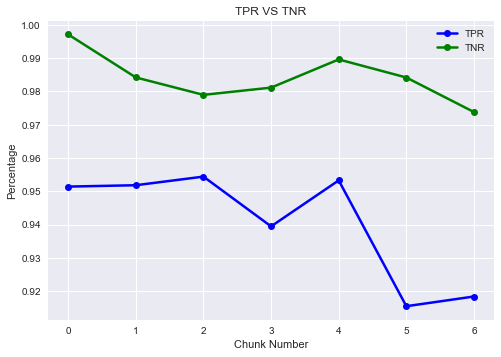

In [33]:
plt.plot(li_tpr,color="blue", linewidth=2.5, linestyle="-",label="TPR",marker='o')
plt.plot(li_tnr,color="green", linewidth=2.5, linestyle="-",label="TNR",marker='o')
plt.legend(loc='upper right')
plt.xlabel("Chunk Number")
plt.ylabel("Percentage")
plt.title("TPR VS TNR")

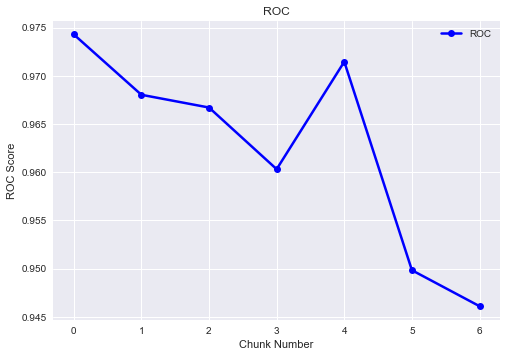

In [34]:
plt.plot(li_roc,color="blue", linewidth=2.5, linestyle="-",label="ROC",marker = 'o')
plt.legend(loc='upper right')
plt.xlabel("Chunk Number")
plt.ylabel("ROC Score")
plt.title("ROC")

###### ADABoostClassifier

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                    test_size=0.3,random_state=10)

adaBoost = AdaBoostClassifier(n_estimators=50,learning_rate=1.0, algorithm='SAMME')
adaBoost.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME', base_estimator=None, learning_rate=1.0,
          n_estimators=50, random_state=None)

In [36]:
C = confusion_matrix(y_train,adaBoost.predict(X_train))
training_Accuracy_score = ((C[0,0]+C[1,1])/(C[0,0]+C[0,1]+C[1,0]+C[1,1]))
training_Senstivity =  C[1,1]/(C[1,0]+C[1,1])
training_Specifity = C[0,0]/(C[0,1]+C[0,0])

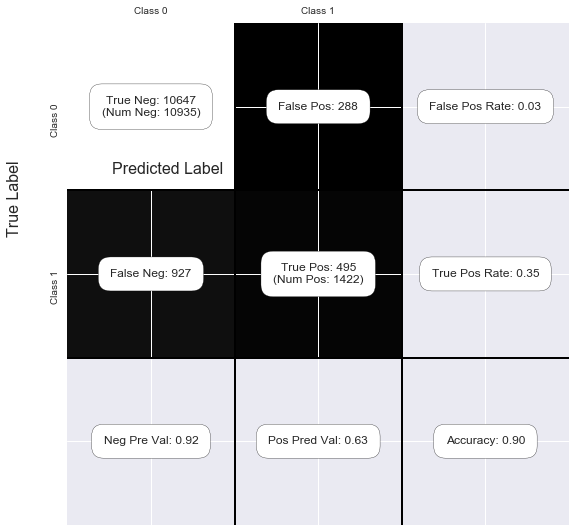

In [37]:
C = confusion_matrix(y_test,adaBoost.predict(X_test))
show_confusion_matrix(C, ['Class 0', 'Class 1'])
testing_Accuracy_score = ((C[0,0]+C[1,1])/(C[0,0]+C[0,1]+C[1,0]+C[1,1]))
testing_Senstivity =  C[1,1]/(C[1,0]+C[1,1])
testing_Specifity = C[0,0]/(C[0,1]+C[0,0])
final_dict.append({'Model':'ADABoost','Train_A_S':training_Accuracy_score
    ,'Train_TPR':training_Senstivity,
    'Train_TNR':training_Specifity,
    'Test_A_S':testing_Accuracy_score,
    'Test_TPR':testing_Senstivity,
    'Test_TNR':testing_Specifity})

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                    test_size=0.3,random_state=10)
gbt = GradientBoostingClassifier(n_estimators=200, max_depth=3)
gbt.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=200, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)

In [39]:
#gbt.estimators_
C = confusion_matrix(y_train,gbt.predict(X_train))
training_Accuracy_score = ((C[0,0]+C[1,1])/(C[0,0]+C[0,1]+C[1,0]+C[1,1]))
training_Senstivity =  C[1,1]/(C[1,0]+C[1,1])
training_Specifity = C[0,0]/(C[0,1]+C[0,0])


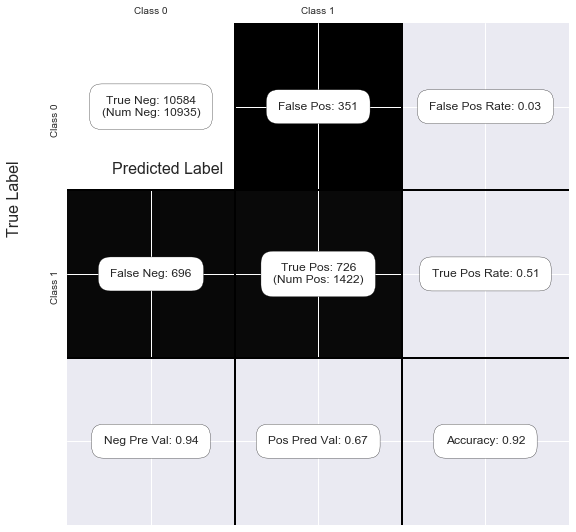

In [40]:
C = confusion_matrix(y_test,gbt.predict(X_test))
show_confusion_matrix(C, ['Class 0', 'Class 1'])
testing_Accuracy_score = ((C[0,0]+C[1,1])/(C[0,0]+C[0,1]+C[1,0]+C[1,1]))
testing_Senstivity =  C[1,1]/(C[1,0]+C[1,1])
testing_Specifity = C[0,0]/(C[0,1]+C[0,0])
final_dict.append({'Model':'GBT','Train_A_S':training_Accuracy_score
    ,'Train_TPR':training_Senstivity,
    'Train_TNR':training_Specifity,
    'Test_A_S':testing_Accuracy_score,
    'Test_TPR':testing_Senstivity,
    'Test_TNR':testing_Specifity})

###### OverSampling

In [41]:
X.shape

(41188, 63)

In [42]:
y.shape

(41188,)

###### SMOTE

In [43]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE

In [44]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_sample(X, y)

In [45]:
print('Resampled dataset shape {}'.format(Counter(y_res)))

Resampled dataset shape Counter({0: 36548, 1: 36548})


In [46]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3,random_state=10)
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [47]:
C = confusion_matrix(y_train,clf.predict(X_train))
training_Accuracy_score = ((C[0,0]+C[1,1])/(C[0,0]+C[0,1]+C[1,0]+C[1,1]))
training_Senstivity =  C[1,1]/(C[1,0]+C[1,1])
training_Specifity = C[0,0]/(C[0,1]+C[0,0])

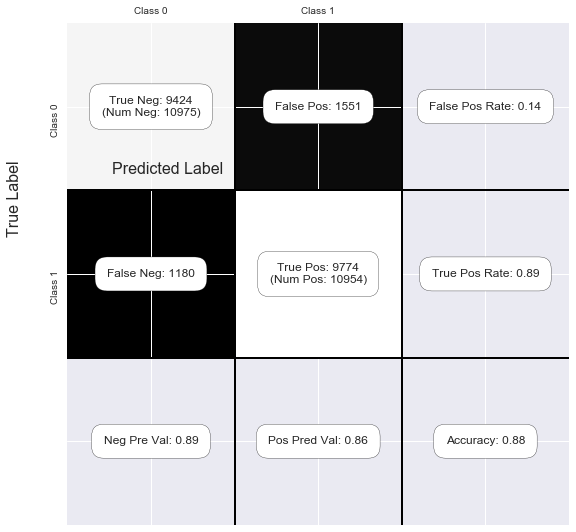

In [48]:
C = confusion_matrix(y_test,clf.predict(X_test))
show_confusion_matrix(C, ['Class 0', 'Class 1'])
testing_Accuracy_score = ((C[0,0]+C[1,1])/(C[0,0]+C[0,1]+C[1,0]+C[1,1]))
testing_Senstivity =  C[1,1]/(C[1,0]+C[1,1])
testing_Specifity = C[0,0]/(C[0,1]+C[0,0])
final_dict.append({'Model':'SMOTE_LR','Train_A_S':training_Accuracy_score
    ,'Train_TPR':training_Senstivity,
    'Train_TNR':training_Specifity,
    'Test_A_S':testing_Accuracy_score,
    'Test_TPR':testing_Senstivity,
    'Test_TNR':testing_Specifity})

###### RandomOverSampler

In [49]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_res_ros, y_res_ros = ros.fit_sample(X, y)
print('Resampled dataset shape {}'.format(Counter(y_res_ros)))

Resampled dataset shape Counter({0: 36548, 1: 36548})


In [50]:
X_train, X_test, y_train, y_test = train_test_split(X_res_ros, y_res_ros, 
                                        test_size=0.3,random_state=10)
clf = LogisticRegression(C=.01,max_iter=1000)
clf.fit(X_train, y_train)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

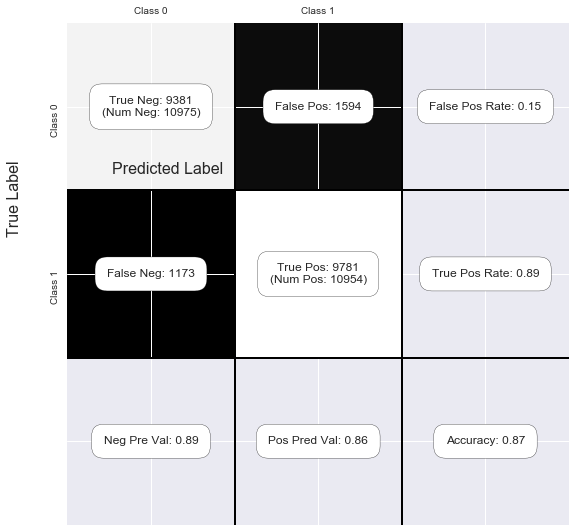

In [51]:
C = confusion_matrix(y_test,clf.predict(X_test))
show_confusion_matrix(C, ['Class 0', 'Class 1'])

###### ADASYN

In [52]:
from imblearn.over_sampling import ADASYN
adasyn = ADASYN(random_state=42)
X_res_ada, y_res_ada = adasyn.fit_sample(X, y)

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X_res_ada, y_res_ada, 
                                        test_size=0.3,random_state=10)
clf = LogisticRegression(C=.01,max_iter=1000)
clf.fit(X_train, y_train)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

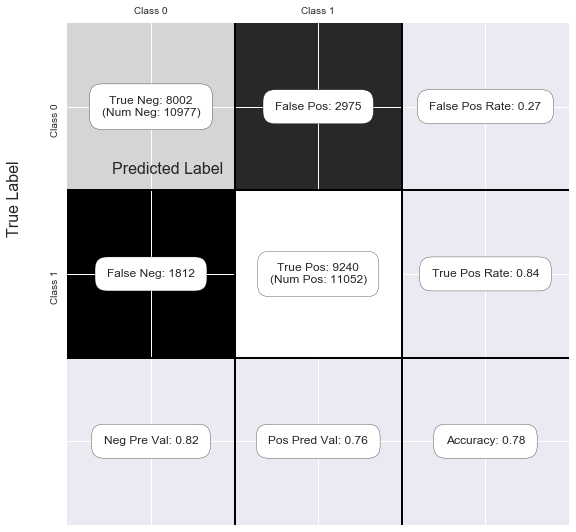

In [54]:
C = confusion_matrix(y_test,clf.predict(X_test))
show_confusion_matrix(C, ['Class 0', 'Class 1'])

###### RandomUnderSampler

In [55]:
from imblearn.under_sampling import RandomUnderSampler

In [56]:
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_sample(X, y)

In [57]:
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({0: 36548, 1: 4640})
Resampled dataset shape Counter({0: 4640, 1: 4640})


In [58]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, 
                                    test_size=0.3,random_state=10)
gbt = GradientBoostingClassifier(n_estimators=200, max_depth=3)
gbt.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=200, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)

In [59]:
C = confusion_matrix(y_train,gbt.predict(X_train))
training_Accuracy_score = ((C[0,0]+C[1,1])/(C[0,0]+C[0,1]+C[1,0]+C[1,1]))
training_Senstivity =  C[1,1]/(C[1,0]+C[1,1])
training_Specifity = C[0,0]/(C[0,1]+C[0,0])

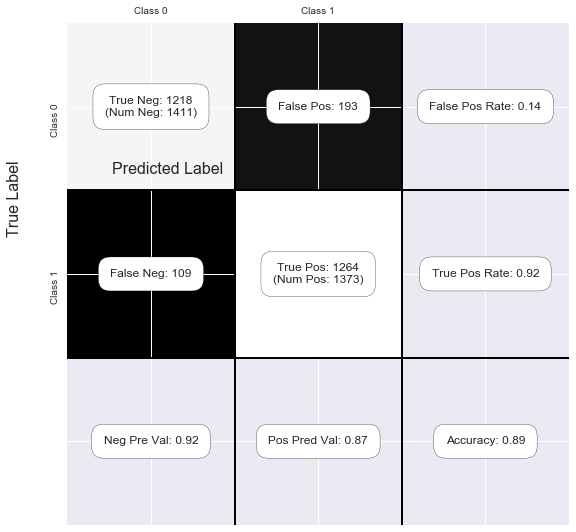

TPR 0.921
TNR 0.863


In [60]:
C = confusion_matrix(y_test,gbt.predict(X_test))
show_confusion_matrix(C, ['Class 0', 'Class 1'])
tpr = C[1,1]/(C[1,0]+C[1,1])
tnr = C[0,0]/(C[0,1]+C[0,0])
print("TPR {:.3f}".format(tpr))
print("TNR {:.3f}".format(tnr))
testing_Accuracy_score = ((C[0,0]+C[1,1])/(C[0,0]+C[0,1]+C[1,0]+C[1,1]))
testing_Senstivity =  C[1,1]/(C[1,0]+C[1,1])
testing_Specifity = C[0,0]/(C[0,1]+C[0,0])
final_dict.append({'Model':'Rand_UnderSler_GBT','Train_A_S':training_Accuracy_score
    ,'Train_TPR':training_Senstivity,
    'Train_TNR':training_Specifity,
    'Test_A_S':testing_Accuracy_score,
    'Test_TPR':testing_Senstivity,
    'Test_TNR':testing_Specifity})

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, 
                                        test_size=0.3,random_state=10)
clf = LogisticRegression(C=.01,max_iter=1000)
clf.fit(X_train, y_train)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [62]:
C = confusion_matrix(y_train,clf.predict(X_train))
training_Accuracy_score = ((C[0,0]+C[1,1])/(C[0,0]+C[0,1]+C[1,0]+C[1,1]))
training_Senstivity =  C[1,1]/(C[1,0]+C[1,1])
training_Specifity = C[0,0]/(C[0,1]+C[0,0])

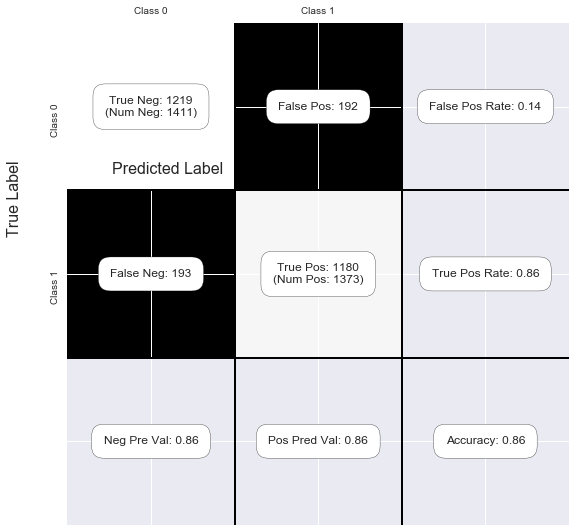

TPR 0.859
TNR 0.864


In [63]:
C = confusion_matrix(y_test,clf.predict(X_test))
show_confusion_matrix(C, ['Class 0', 'Class 1'])
tpr = C[1,1]/(C[1,0]+C[1,1])
tnr = C[0,0]/(C[0,1]+C[0,0])
print("TPR {:.3f}".format(tpr))
print("TNR {:.3f}".format(tnr))
testing_Accuracy_score = ((C[0,0]+C[1,1])/(C[0,0]+C[0,1]+C[1,0]+C[1,1]))
testing_Senstivity =  C[1,1]/(C[1,0]+C[1,1])
testing_Specifity = C[0,0]/(C[0,1]+C[0,0])
final_dict.append({'Model':'Rand_UnderSler_LR','Train_A_S':training_Accuracy_score
    ,'Train_TPR':training_Senstivity,
    'Train_TNR':training_Specifity,
    'Test_A_S':testing_Accuracy_score,
    'Test_TPR':testing_Senstivity,
    'Test_TNR':testing_Specifity})

In [64]:
results = pd.DataFrame(final_dict)

In [65]:
results

,Model,Test_A_S,Test_TNR,Test_TPR,Train_A_S,Train_TNR,Train_TPR
0,LR,0.907745,0.975034,0.390295,0.911519,0.975286,0.403978
1,RFC,0.909201,0.976772,0.389592,1.000000,1.000000,1.000000
2,ADABoost,0.901675,0.973663,0.348101,0.906594,0.974544,0.365755
3,GBT,0.915271,0.967901,0.510549,0.928272,0.972631,0.575202
4,SMOTE_LR,0.875462,0.858679,0.892277,0.877441,0.861925,0.892944
5,Rand_UnderSler_GBT,0.891523,0.863218,0.920612,0.914717,0.877671,0.951331
6,Rand_UnderSler_LR,0.861710,0.863926,0.859432,0.873307,0.859709,0.886746


In [66]:
#result Comparison with Hany A. Elsalamony

![title](Img.jpg)